In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
# Loading data

train_data  = pd.read_csv('/content/sample_data/train.csv')
test_data   = pd.read_csv('/content/sample_data/test.csv')

# print (test_data.shape)
# print(train_data)

train_data_x = train_data
print (train_data_x)

            id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
4     0016bb22                    Spring               18                1   
...        ...                       ...              ...              ...   
3955  ff8a2de4                      Fall               13                0   
3956  ffa9794a                    Winter               10                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   
3959  ffef538e                    Spring               11                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI

In [33]:
train_data_x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,3960.0,10.433586,3.574648,5.0,8.00000,10.000000,13.000000,22.000000
Basic_Demos-Sex,3960.0,0.372727,0.483591,0.0,0.00000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,2421.0,65.454771,22.341862,25.0,59.00000,65.000000,75.000000,999.000000
Physical-BMI,3022.0,19.331929,5.113934,0.0,15.86935,17.937682,21.571244,59.132048
Physical-Height,3027.0,55.946713,7.473764,33.0,50.00000,55.000000,62.000000,78.500000
...,...,...,...,...,...,...,...,...
PCIAT-PCIAT_Total,2736.0,27.896199,20.338853,0.0,12.00000,26.000000,41.000000,93.000000
SDS-SDS_Total_Raw,2609.0,41.088923,10.427433,17.0,33.00000,39.000000,46.000000,96.000000
SDS-SDS_Total_T,2606.0,57.763622,13.196091,38.0,47.00000,55.000000,64.000000,100.000000
PreInt_EduHx-computerinternet_hoursday,3301.0,1.060588,1.094875,0.0,0.00000,1.000000,2.000000,3.000000


In [6]:
# train_data.info()
train_data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [7]:
train_data_x['sii'].value_counts()

,count
sii,
0.0,1594
1.0,730
2.0,378
3.0,34


In [47]:
# take columns with more than 50% available data
threshold = 0.5 * len(train_data_x)
print (threshold)
columns_with_data = train_data_x.columns[train_data_x.isnull().sum() < threshold]
print (len(columns_with_data))
train_data_x = train_data_x[columns_with_data]

print (train_data_x)


1980.0
69
            id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
4     0016bb22                    Spring               18                1   
...        ...                       ...              ...              ...   
3955  ff8a2de4                      Fall               13                0   
3956  ffa9794a                    Winter               10                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   
3959  ffef538e                    Spring               11                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Ph

In [48]:
# Identify categorical columns for seasons
season_cols = [
    'Basic_Demos-Enroll_Season',
    'CGAS-Season',
    'Physical-Season',
    'FGC-Season',
    'BIA-Season',
    'PCIAT-Season',
    'SDS-Season',
    'PreInt_EduHx-Season',
    'Fitness_Endurance-Season',
    'PAQ_A-Season',
    'PAQ_C-Season'
]

print (train_data_x)
# Identify columns with missing values
missing_columns = train_data_x.columns[train_data_x.isnull().any()]


# Fill missing values in categorical and numerical columns
for col in missing_columns:
    print(col)
    if col == 'sii':
      break
    if train_data_x[col].dtype == 'object':  # Categorical columns (strings or objects)
        train_data_x[col] = train_data_x[col].fillna(train_data_x[col].mode()[0])  # Fill with mode (most frequent value)
    else:  # Numerical columns (integers, floats)
       train_data_x[col] = train_data_x[col].fillna(train_data_x[col].median())  # Fill with median for numerical columns
       print (col)

# Create a mapping dictionary for seasons
season_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Fall': 2,
    'Winter': 3
}
# Apply manual encoding to the categorical columns
for col in season_cols:
    if col in train_data_x.columns:
        train_data_x[col] = train_data_x[col].replace(season_mapping)
# print (train_data)
# # Impute NaN values in season columns with the mode (most frequent value)

# print (train_data_x)

            id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
4     0016bb22                    Spring               18                1   
...        ...                       ...              ...              ...   
3955  ff8a2de4                      Fall               13                0   
3956  ffa9794a                    Winter               10                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   
3959  ffef538e                    Spring               11                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI

<ipython-input-48-7a7beb24f8b2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x[col] = train_data_x[col].fillna(train_data_x[col].mode()[0])  # Fill with mode (most frequent value)
<ipython-input-48-7a7beb24f8b2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x[col] = train_data_x[col].fillna(train_data_x[col].median())  # Fill with median for numerical columns
<ipython-input-48-7a7beb24f8b2>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

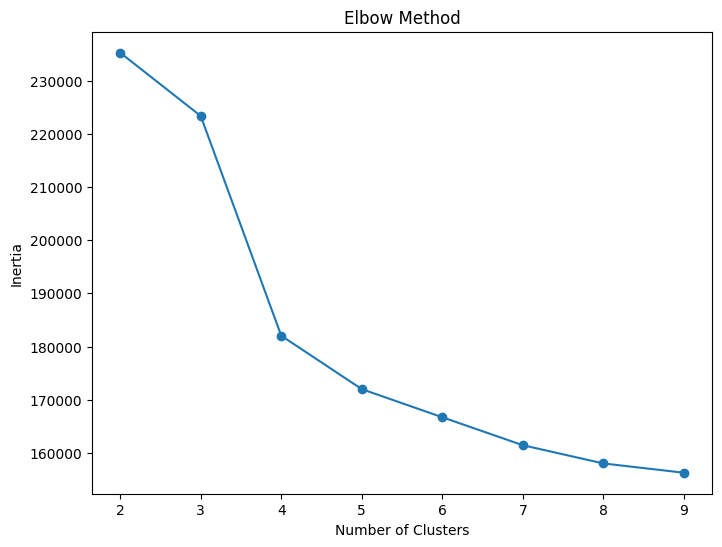

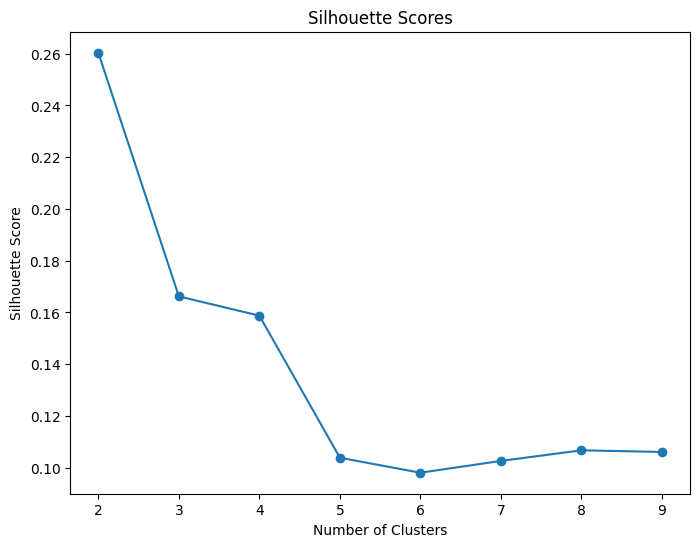

In [27]:
# Choosing number of clusters
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot inertia
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


<ipython-input-49-d9660b94589e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x['cluster'] = kmeans.fit_predict(scaled_features)


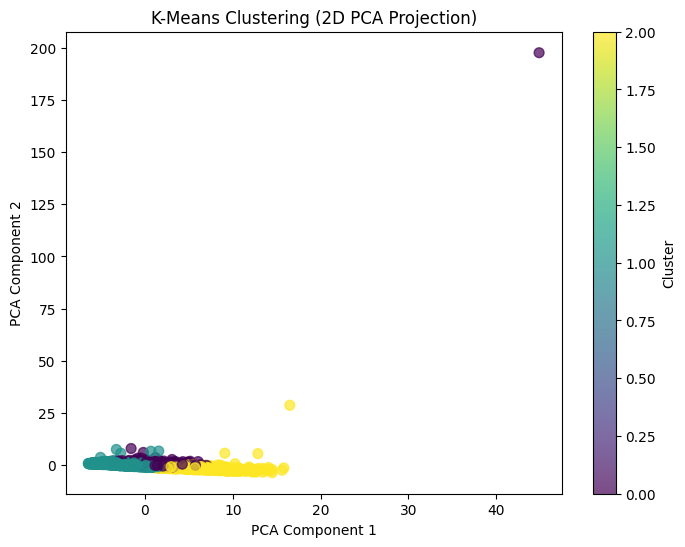

In [49]:
# k-means clustering to group data into distinct clusters based on similarity

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



features = train_data_x.drop(columns=["id", "sii"])  # Drop target and ID columns

# Scale features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
# Add cluster labels as a new feature
train_data_x['cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=train_data_x['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [29]:
print (train_data_x)

            id  Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                          2                5                0   
1     000fd460                          1                9                0   
2     00105258                          1               10                1   
3     00115b9f                          3                9                0   
4     0016bb22                          0               18                1   
...        ...                        ...              ...              ...   
3955  ff8a2de4                          2               13                0   
3956  ffa9794a                          3               10                0   
3957  ffcd4dbd                          2               11                0   
3958  ffed1dd5                          0               13                0   
3959  ffef538e                          0               11                0   

      CGAS-Season  CGAS-CGAS_Score  Physical-Season

In [50]:
# fill missing values of sii using cluster information
for cluster in train_data_x['cluster'].unique():
    # Calculate the mode of the target for the current cluster
    cluster_mode = train_data_x[train_data_x['cluster'] == cluster]['sii'].mode()

    if not cluster_mode.empty:  # Ensure mode calculation succeeded
        # Impute missing target values with the mode
        train_data_x.loc[(train_data_x['cluster'] == cluster) & (train_data_x['sii'].isna()), 'sii'] = cluster_mode[0]

common_columns = train_data_x.columns.intersection(test_data.columns)
# print (common_columns)

train_data_common = train_data_x[common_columns]

y = train_data_x['sii']
print (y.shape)
# print(train_data)
X = train_data_common.drop(columns=['id'])
X['cluster'] = train_data_x['cluster']

print (X)

train_data_x['sii'].value_counts()
train_data_x.shape
print(train_data_x['sii'].value_counts())

(3960,)
      Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0                             2                5                0   
1                             1                9                0   
2                             1               10                1   
3                             3                9                0   
4                             0               18                1   
...                         ...              ...              ...   
3955                          2               13                0   
3956                          3               10                0   
3957                          2               11                0   
3958                          0               13                0   
3959                          0               11                0   

      CGAS-Season  CGAS-CGAS_Score  Physical-Season  Physical-BMI  \
0               3             51.0                2     16.877316   
1               0        

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [52]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [62]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler


# Initialize individual models
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # Number of boosting rounds
    learning_rate=0.001,     # Step size shrinking to avoid overfitting
    max_depth=4,           # Maximum depth of individual trees
    subsample=0.7,         # Fraction of samples used for fitting each tree
    colsample_bytree=0.7,   # Fraction of features used for fitting each tree
    reg_alpha=2,  # Add L1 regularization
    reg_lambda=2
)
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.001, depth=5, random_state=42, verbose=0)

# Create the Voting Classifier with 'hard' voting
voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('catboost', catboost_model)], voting='soft')

# Train all models
xgb_model.fit(X_train_scaled, y_train)  # Use PCA-transformed data
catboost_model.fit(X_train_scaled, y_train)  # Use PCA-transformed data
voting_clf.fit(X_train_scaled, y_train)  # Use PCA-transformed data

# Make predictions using each model
y_pred_xgb = xgb_model.predict(X_test_scaled)  # Use PCA-transformed test data
y_pred_catboost = catboost_model.predict(X_test_scaled)  # Use PCA-transformed test data

# Reshape CatBoost predictions to 1D if necessary
y_pred_catboost = y_pred_catboost.ravel()  # or use .flatten()

# Debugging: Check shapes of individual predictions
print(f"Shape of XGBoost predictions: {y_pred_xgb.shape}")
print(f"Shape of CatBoost predictions: {y_pred_catboost.shape}")


# Make predictions with the voting classifier
y_pred_voting = voting_clf.predict(X_test_scaled)  # Use PCA-transformed test data

# Debugging: Check shape of voting predictions
print(f"Shape of Voting Classifier predictions: {y_pred_voting.shape}")

# Evaluate the models
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)  # Assuming y_test is defined
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)  # Assuming y_test is defined
voting_accuracy = accuracy_score(y_test, y_pred_voting)  # Assuming y_test is defined

# Print the accuracies
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(f"CatBoost Test Accuracy: {catboost_accuracy:.4f}")
print(f"Voting Classifier Test Accuracy: {voting_accuracy:.4f}")

# Optionally, display the performance of each model
models = ['XGBoost', 'CatBoost', 'Voting Classifier']
accuracies = [xgb_accuracy, catboost_accuracy, voting_accuracy]

# Create a DataFrame for visualization
model_performance = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(model_performance)


Shape of XGBoost predictions: (792,)
Shape of CatBoost predictions: (792,)
Shape of Voting Classifier predictions: (792,)
XGBoost Test Accuracy: 0.7172
CatBoost Test Accuracy: 0.7071
Voting Classifier Test Accuracy: 0.7058
               Model  Accuracy
0            XGBoost  0.717172
1           CatBoost  0.707071
2  Voting Classifier  0.705808


In [54]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Initialize the XGBoost classifier with hyperparameters
model = xgb.XGBClassifier(
    n_estimators=250,      # Number of boosting rounds
    learning_rate=0.001,     # Step size shrinking to avoid overfitting
    max_depth=5,           # Maximum depth of individual trees
    subsample=0.7,         # Fraction of samples used for fitting each tree
    colsample_bytree=0.7,   # Fraction of features used for fitting each tree
    reg_alpha=2,  # Add L1 regularization
    reg_lambda=2
)

# Train the model using the resampled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Feature importance
print("Feature Importances:")
print(model.feature_importances_)


Training Accuracy: 0.8699494949494949
Test Accuracy: 0.8156565656565656
Feature Importances:
[0.00278278 0.01709998 0.00331898 0.00441532 0.00602195 0.00291079
 0.00945656 0.08446025 0.02920041 0.00410859 0.00580087 0.00475358
 0.00355363 0.00671818 0.00308604 0.00602529 0.0064036  0.00421509
 0.00605838 0.00444821 0.00695973 0.00661236 0.00897023 0.00372963
 0.00344444 0.00512167 0.00562811 0.00986848 0.00669812 0.00628817
 0.00744071 0.00559612 0.00672239 0.0066476  0.00193212 0.00792039
 0.00707032 0.00913693 0.00652548 0.01141714 0.02398744 0.02146527
 0.0206361  0.00371115 0.01091074 0.57072073]


In [55]:
# Instantiate the Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_depth=7,
                                  min_samples_split=10,
                                  min_samples_leaf=4)

In [56]:
# Fit the Model on PCA-transformed data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [57]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Calculate the accuracy on the test set
accuracy_x = rf_model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy_x}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92       531
         1.0       0.62      0.51      0.56       177
         2.0       0.62      0.59      0.60        76
         3.0       0.00      0.00      0.00         8

    accuracy                           0.81       792
   macro avg       0.53      0.51      0.52       792
weighted avg       0.79      0.81      0.80       792

Confusion Matrix:
[[506  25   0   0]
 [ 66  90  21   0]
 [  1  30  45   0]
 [  0   1   7   0]]
Model Accuracy: 0.8093434343434344


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
